In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

# A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

## 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

## 1.3 On the basis of descriptive measure of variability, which item shows the most inconsistent behavior? Which items show the least inconsistent behaviour?

## 1.4 Are there any outliers in the data?

## 1.5 On the basis of this report, what are the recommendations?

In [2]:
df1 = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df1.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [5]:
df1.describe(include = 'all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


The maximum spent are by 
 Buyer/Spender       440
Channel          Retail
dtype: object
The minimum spent are by 
 Buyer/Spender        1
Channel          Hotel
dtype: object


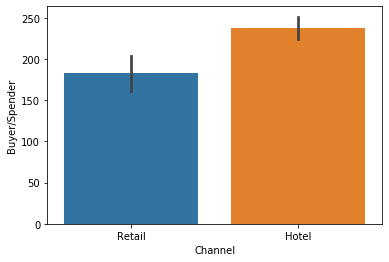

In [6]:
sns.barplot(df1['Channel'], df1['Buyer/Spender']);
print('The maximum spent are by \n',df1[['Buyer/Spender','Channel']].max())
print('The minimum spent are by \n',df1[['Buyer/Spender','Channel']].min())

## From this above graph we found that the channel Hotel seems to spend more and Retail spends less

The maximum spent are by 
 Buyer/Spender      440
Region           Other
dtype: object
The minimum spent are by 
 Buyer/Spender         1
Region           Lisbon
dtype: object


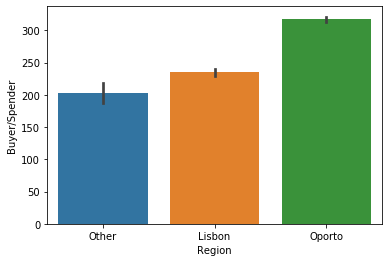

In [7]:
sns.barplot(df1['Region'], df1['Buyer/Spender']);
print('The maximum spent are by \n',df1[['Buyer/Spender','Region']].max())
print('The minimum spent are by \n',df1[['Buyer/Spender','Region']].min())

## From this above graph we found that the Region Oporto seems to spend more and the other regions spends less

# 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [8]:
cplot = df1.groupby('Channel').describe()
print(cplot)
cf = df1.loc[df1['Channel'].value_counts()]
cf.describe()
rplot = df1.groupby('Region').describe()
print(rplot)
rf = df1.loc[df1['Region'].value_counts()]
rf.describe()

        Buyer/Spender                                                      \
                count        mean         std  min     25%    50%     75%   
Channel                                                                     
Hotel           298.0  238.369128  120.910343  4.0  137.25  241.5  344.50   
Retail          142.0  183.000000  132.136132  1.0   61.25  166.5  303.75   

                Fresh                ... Detergents_Paper           \
           max  count          mean  ...              75%      max   
Channel                              ...                             
Hotel    440.0  298.0  13475.560403  ...            899.5   6907.0   
Retail   438.0  142.0   8904.323944  ...           8662.5  40827.0   

        Delicatessen                                                         \
               count         mean          std  min     25%     50%     75%   
Channel                                                                       
Hotel          298.0  1415

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,147.666667,21266.000000,22777.000000,28770.666667,3776.666667,12096.000000,2844.333333
std,147.412121,20251.580704,27845.720748,26685.747700,3584.835608,12044.119686,3135.688973
min,48.000000,7127.000000,1375.000000,2201.000000,869.000000,83.000000,1009.000000
25%,63.000000,9666.000000,7036.000000,15370.500000,1774.000000,6058.500000,1034.000000
50%,78.000000,12205.000000,12697.000000,28540.000000,2679.000000,12034.000000,1059.000000
75%,197.500000,28335.500000,33478.000000,42055.500000,5230.500000,18102.500000,3762.000000
max,317.000000,44466.000000,54259.000000,55571.000000,7782.000000,24171.000000,6465.000000


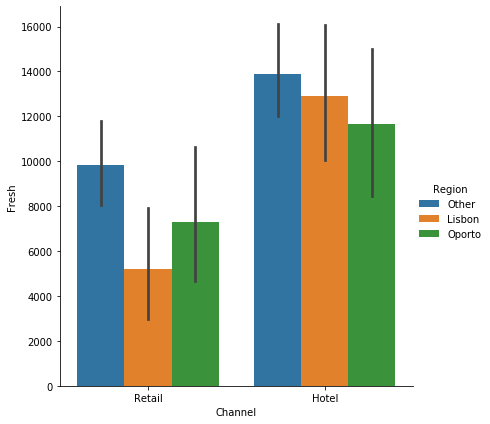

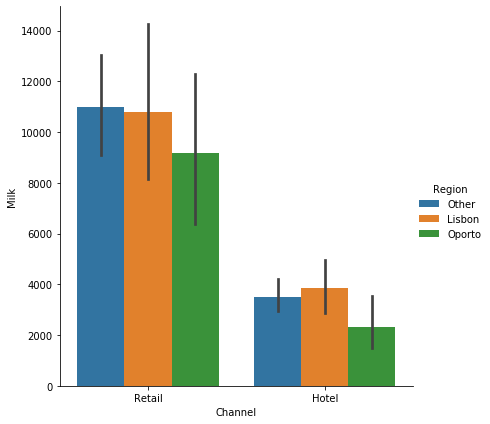

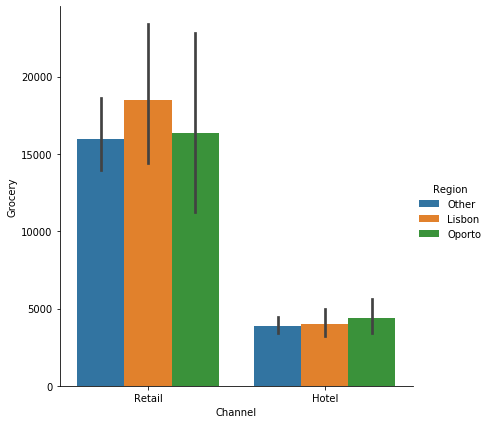

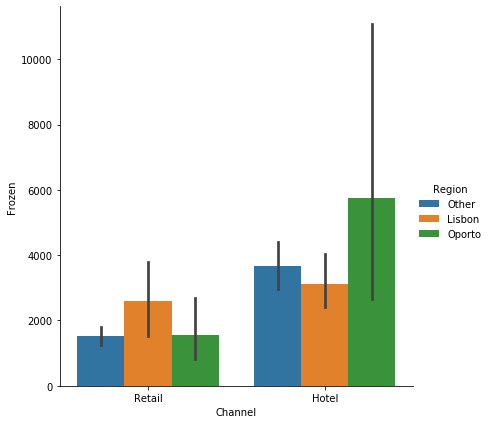

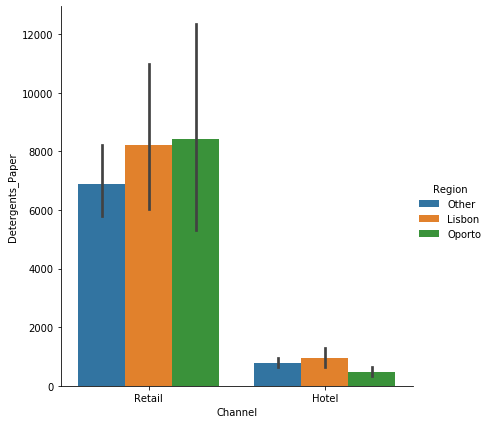

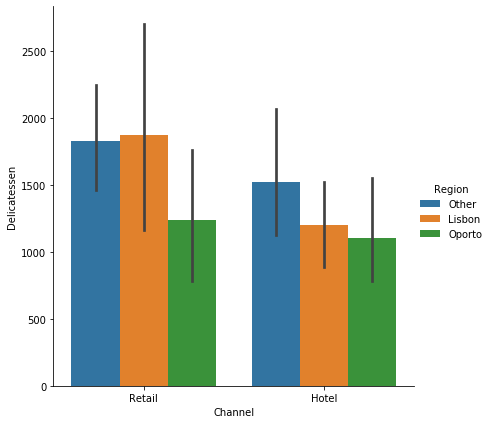

In [9]:
sns.catplot(x ='Channel' , y = 'Fresh', data = df1,  hue = 'Region',kind = 'bar', height=6)
sns.catplot(x ='Channel' , y = 'Milk', data = df1,  hue = 'Region',kind = 'bar', height=6)
sns.catplot(x ='Channel' , y = 'Grocery', data = df1,  hue = 'Region',kind = 'bar', height=6)
sns.catplot(x ='Channel' , y = 'Frozen', data = df1,  hue = 'Region',kind = 'bar', height=6)
sns.catplot(x ='Channel' , y = 'Detergents_Paper', data = df1,  hue = 'Region',kind = 'bar', height=6)
sns.catplot(x ='Channel' , y = 'Delicatessen', data = df1,  hue = 'Region',kind = 'bar', height=6)



## From this observation, it is shown that not all varieties shows similar behaviour across channels and regions

# 1.3 On the basis of descriptive measure of variability, which item shows the most inconsistent behavior? Which items show the least inconsistent behaviour?

In [10]:
#Mean of all variables in the dataset
m = df1.mean()
m

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [11]:
# Standard deviation of all the variables in the dataset
s = df1.std()
s

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [12]:
# Coeficient of variation of all variables in the data set
# Coeficient of variation= Standard deviation/Mean
v = s/m
v

Buyer/Spender       0.576695
Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

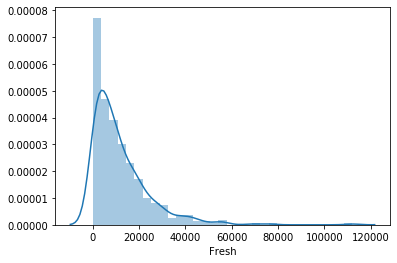

In [13]:
sns.distplot(df1['Fresh']);

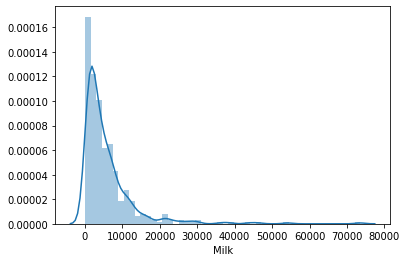

In [14]:
sns.distplot(df1['Milk']);

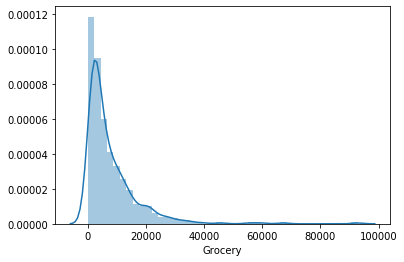

In [15]:
sns.distplot(df1['Grocery']);

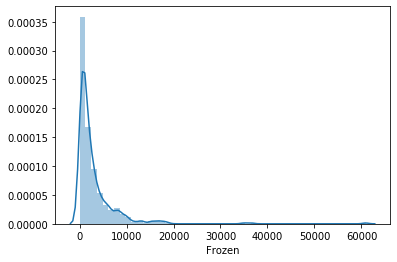

In [16]:
sns.distplot(df1['Frozen']);

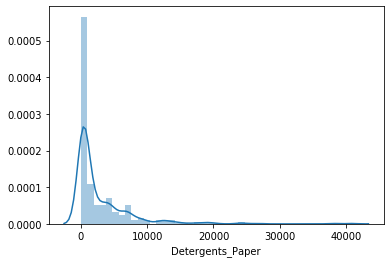

In [17]:
sns.distplot(df1['Detergents_Paper']);

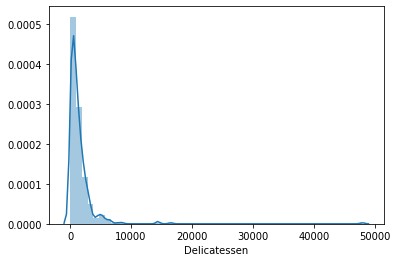

In [18]:
sns.distplot(df1['Delicatessen']);

## From the values of coeficient of varience and dist blot we undertand that the variable with most inconsistent behavior is Delicatessan and least inconsistent behavior is Fresh

# 1.4 Are there any outliers in the data?

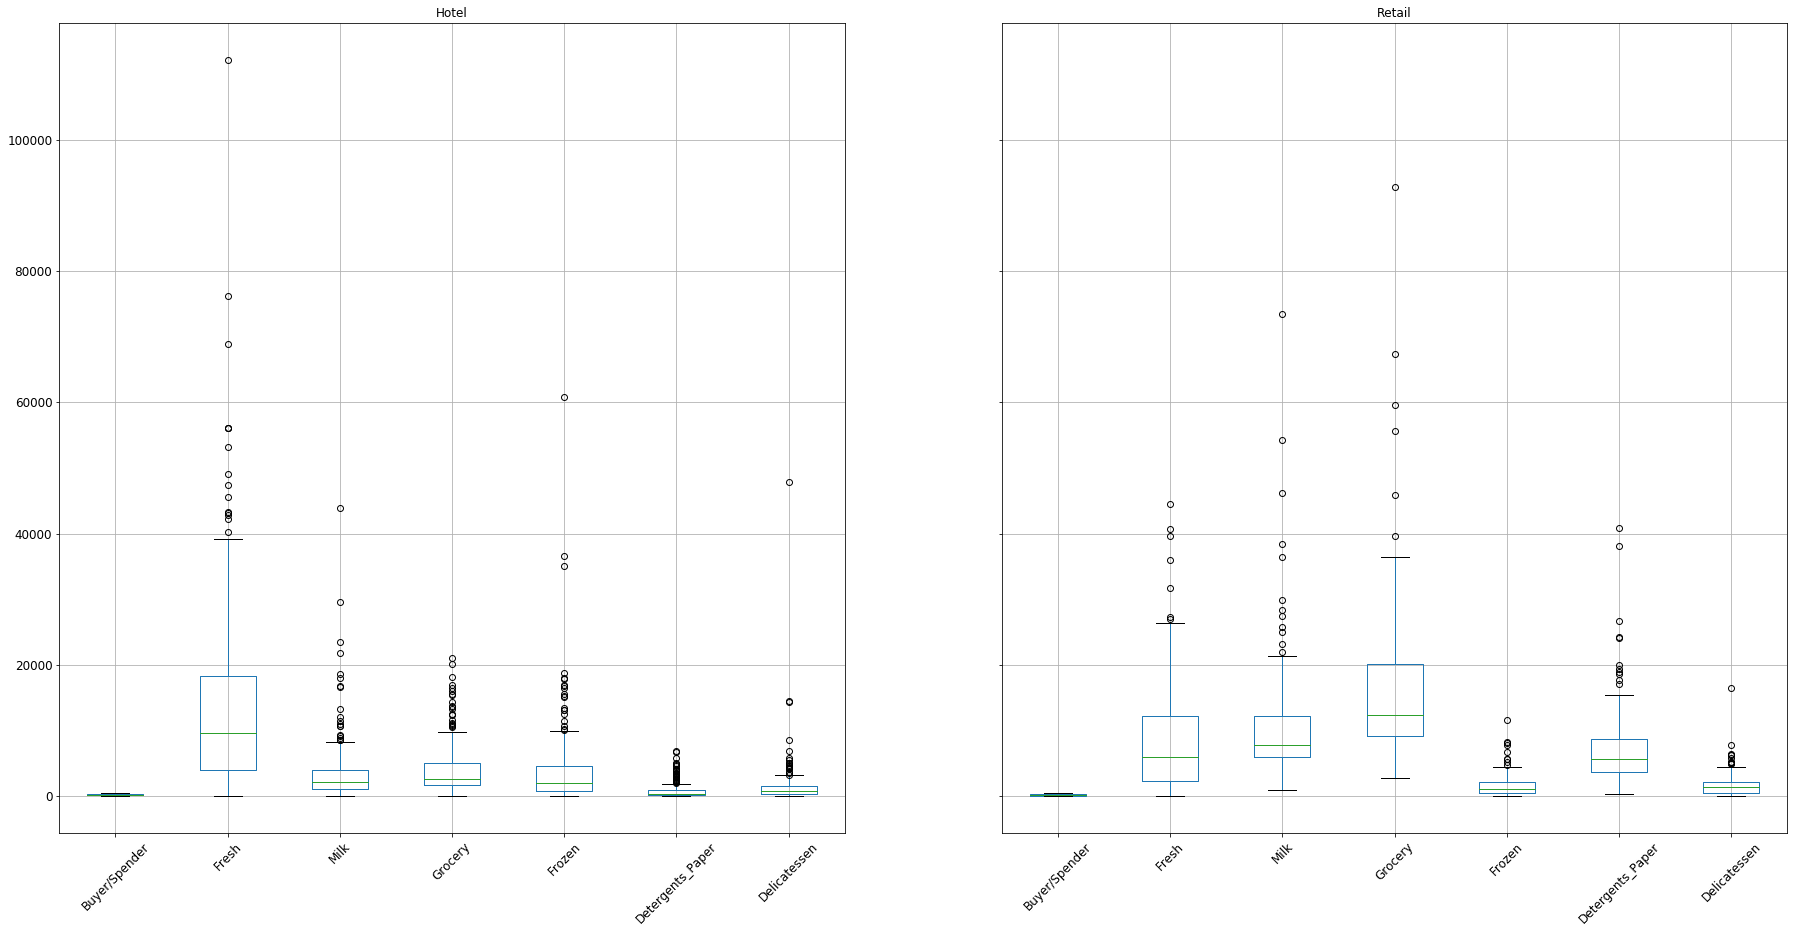

In [19]:
outc = df1.groupby('Channel')
boxplot = outc.boxplot(rot=45,fontsize=12, figsize=(30,15),subplots=True)

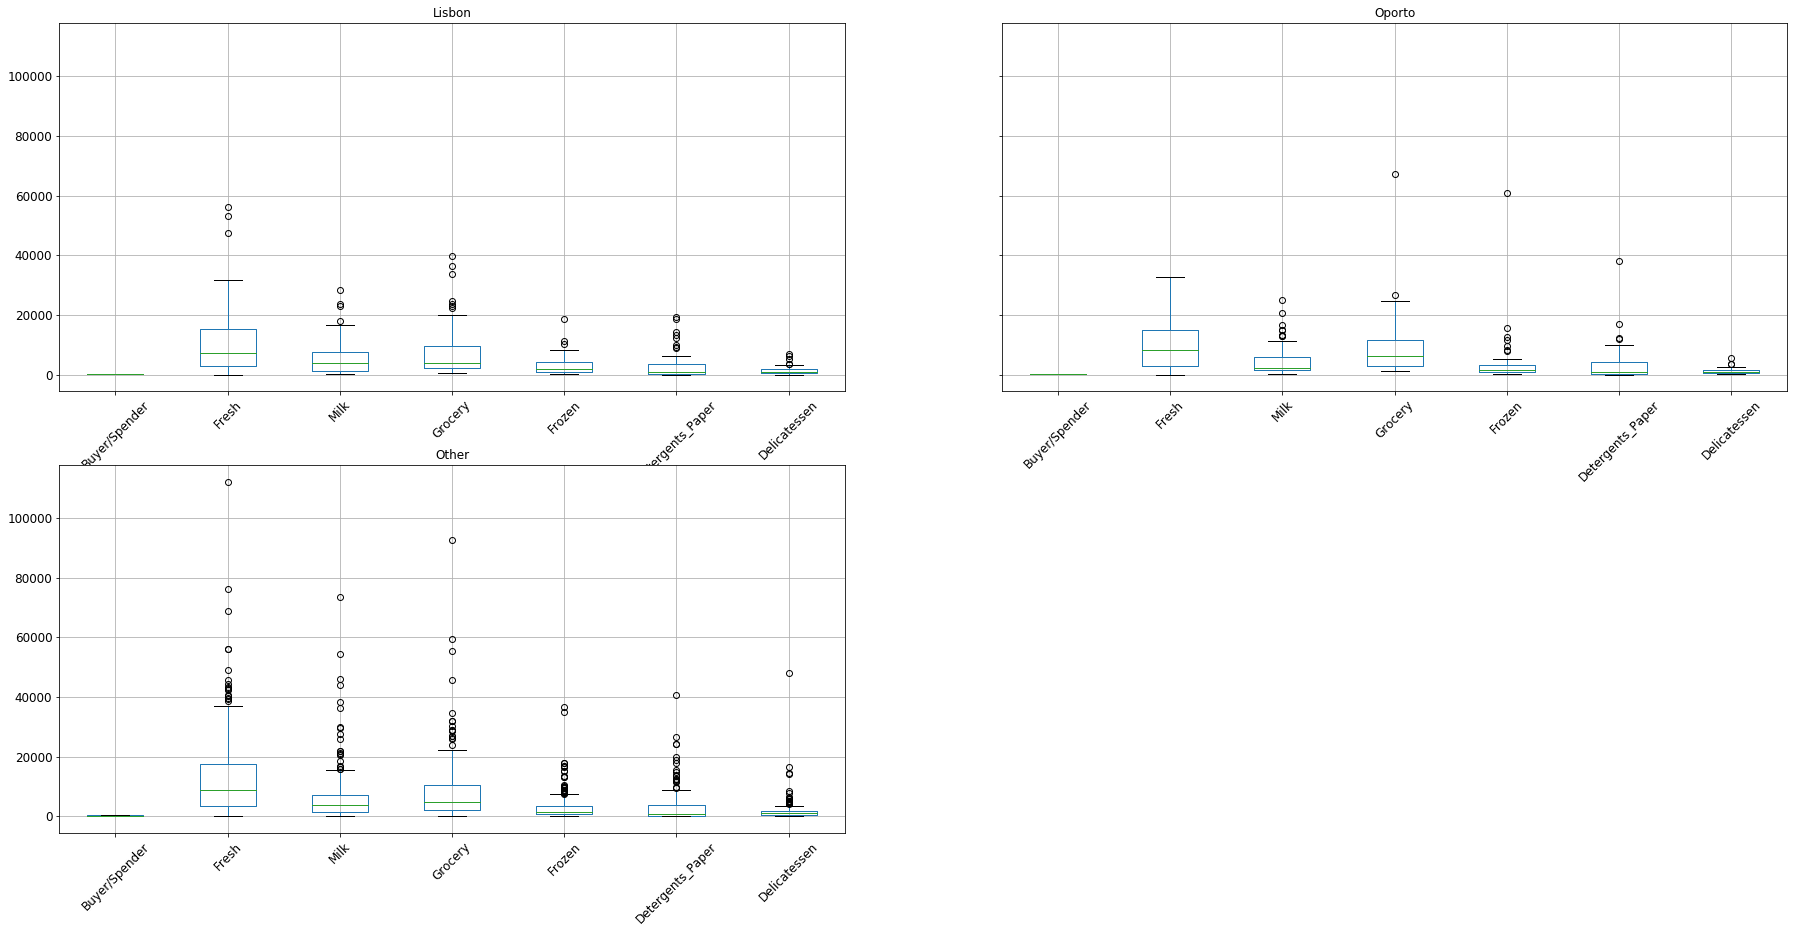

In [20]:
outr = df1.groupby('Region')
boxplot = outr.boxplot(rot=45,fontsize=12, figsize=(30,15),subplots=True)

## Yes there are outlier in all variables

# 1.5 On the basis of this report, what are the recommendations?

# On the basis of these report 

## we can see that the fresh products for retail in Lisbon is too low so we need to market these products for people and retail shops in Lisbon.

## The Milk is sold less in Hotel channels in all regions which indicates its necessities are less in hotels so we better of concentrating on retails in all regions.

## The Frozen products are sold less in retail channels in all regions as they prefer fresh products.

## Detergent papers are sold less in Hotels in all region so we can understand that its purpose is less in hotel channel.

## Delicatessen are sold less in Oporto in both hotel and retail channels in Oporto. So it requires more advertisment and markiting in Oporto.


# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

## 2.1.1. Gender and Major

## 2.1.2. Gender and Grad Intention

## 2.1.3. Gender and Employment

## 2.1.4. Gender and Computer

## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

## 2.2.2. What is the probability that a randomly selected CMSU student will be female?

## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

## 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

# Answer the following questions based on the data

## 2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

## 2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

 

datainput = pd.read_csv('Survey-1.csv')

In [22]:
datainput.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [23]:
datainput.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

## 2.1.1. Gender and Major

## 2.1.2. Gender and Grad Intention

## 2.1.3. Gender and Employment

## 2.1.4. Gender and Computer

In [24]:
crosstab1 = pd.crosstab(datainput['Gender'],datainput['Major'], margins = True)  
crosstab1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [25]:
crosstab2 = pd.crosstab(datainput['Gender'],datainput['Grad Intention'], margins = True) 
crosstab2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [26]:
crosstab3 = pd.crosstab(datainput['Gender'],datainput['Employment'], margins = True) 
crosstab3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [27]:
crosstab4 = pd.crosstab(datainput['Gender'],datainput['Computer'], margins = True) 
crosstab4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

## 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [28]:
Totalstudents = len(datainput.ID)
print('Total number of students=',Totalstudents)

Male = datainput['Gender'].value_counts()['Male']
print('Total number of Male students are',Male)

Female = datainput['Gender'].value_counts()['Female']
print('Total number of Female students are',Female)

Total number of students= 62
Total number of Male students are 29
Total number of Female students are 33


# Probablity that a randomly selected CMSU student will be male
Probality of male=(Number of Male students/Total number of Students)*100

In [29]:
Prob_m = round(Male/Totalstudents,4)
Prob_male=Prob_m*100
print('Probablity that a randomly selected CMSU student will be male',Prob_male)

Probablity that a randomly selected CMSU student will be male 46.77


# Probablity that a randomly selected CMSU student will be female
Probality of female=(Number of female students/Total number of Students)*100
## or

Probality of female=(1 - Probality of male)
  

In [30]:
Prob_female1 = round(Female/Totalstudents,4)*100
print('Probablity that a randomly selected CMSU student will be female',Prob_female1)

Prob_female2 = (1-Prob_m)*100
print('Probablity that a randomly selected CMSU student will be female',Prob_female2)

Probablity that a randomly selected CMSU student will be female 53.23
Probablity that a randomly selected CMSU student will be female 53.23


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

## The conditional probability of different majors among the male students in CMSU

Conditional probability of different majors among both male and female students in CMSU can be calculated by creating a contingency table between gender and major

In [31]:
crosstab1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [32]:
print('The conditional probability of Accounting majors among the male students in CMSU {}'.format((4/29)*100))
print('')
print('The conditional probability of CIS majors among the male students in CMSU {}'.format((1/29)*100))
print('')
print('The conditional probability of Economics/Finance majors among the male students in CMSU {}'.format((4/29)*100))
print('')
print('The conditional probability of International Business majors among the male students in CMSU {}'.format((2/29)*100))
print('')
print('The conditional probability of Management majors among the male students in CMSU {}'.format((6/29)*100))
print('')
print('The conditional probability of Retailing/Marketing majors among the male students in CMSU {}'.format((5/29)*100))
print('')
print('The conditional probability of Undecided majors among the male students in CMSU {}'.format((3/29)*100))
print('')
print('The conditional probability of Other majors among the male students in CMSU {}'.format((4/29)*100))


The conditional probability of Accounting majors among the male students in CMSU 13.793103448275861

The conditional probability of CIS majors among the male students in CMSU 3.4482758620689653

The conditional probability of Economics/Finance majors among the male students in CMSU 13.793103448275861

The conditional probability of International Business majors among the male students in CMSU 6.896551724137931

The conditional probability of Management majors among the male students in CMSU 20.689655172413794

The conditional probability of Retailing/Marketing majors among the male students in CMSU 17.24137931034483

The conditional probability of Undecided majors among the male students in CMSU 10.344827586206897

The conditional probability of Other majors among the male students in CMSU 13.793103448275861


## The conditional probability of different majors among the female students in CMSU

In [33]:
print('The conditional probability of Accounting majors among the female students in CMSU {}'.format((3/33)*100))
print('')
print('The conditional probability of CIS majors among the female students in CMSU {}'.format((3/33)*100))
print('')
print('The conditional probability of Economics/Finance majors among the female students in CMSU {}'.format((7/33)*100))
print('')
print('The conditional probability of International Business majors among the female students in CMSU {}'.format((4/33)*100))
print('')
print('The conditional probability of Management majors among the female students in CMSU {}'.format((4/33)*100))
print('')
print('The conditional probability of Retailing/Marketing majors among the female students in CMSU {}'.format((9/33)*100))
print('')
print('The conditional probability of Undecided majors among the female students in CMSU {}'.format((0/33)*100))
print('')
print('The conditional probability of Other majors among the female students in CMSU {}'.format((3/33)*100))


The conditional probability of Accounting majors among the female students in CMSU 9.090909090909092

The conditional probability of CIS majors among the female students in CMSU 9.090909090909092

The conditional probability of Economics/Finance majors among the female students in CMSU 21.21212121212121

The conditional probability of International Business majors among the female students in CMSU 12.121212121212121

The conditional probability of Management majors among the female students in CMSU 12.121212121212121

The conditional probability of Retailing/Marketing majors among the female students in CMSU 27.27272727272727

The conditional probability of Undecided majors among the female students in CMSU 0.0

The conditional probability of Other majors among the female students in CMSU 9.090909090909092


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

## The probability that a randomly chosen student is a male and intends to graduate.

Probability of CMSU can be calculated by creating a contingency table between gender and graduate intend

Pr(Male with intend to graduate) = Pr(Male AND Intends to graduate) =Pr(male) * Pr(male|intend graduate).

P(A ∩ B) = P(B) * P(A|B) 

In [34]:
crosstab2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [47]:
#Prabablity of male and intend to graduate
Prob_intgr=round(Prob_m*(17/29),3)*100
print('The probability that a randomly chosen student is a male and intends to graduate is',Prob_intgr)

The probability that a randomly chosen student is a male and intends to graduate is 27.400000000000002


## The probability that a randomly selected student is a female and does NOT have a laptop.

Probability of CMSU can be calculated by creating a contingency table between gender and computer

Pr(Female and no laptop) = Pr(female) * (Pr(female desktop)+Pr(female tablet))

P(A ∩ B) = P(B) * P(A|B)


In [44]:
crosstab4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [49]:
Prob_fe_nolap = round(Female/Totalstudents*((2/33)+(2/33)),3)*100
print('The probability that a randomly selected student is a female and does NOT have a laptop is',Prob_fe_nolap)

The probability that a randomly selected student is a female and does NOT have a laptop is 6.5


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

## 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

## The probability that a randomly chosen student is either a male or has full-time employment.
Probability of CMSU can be calculated by creating a contingency table between gender and employment.

Pr(male or full time employment) = Pr(male) + (Pr(student with full time employment))

In [50]:
crosstab3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [57]:
Prob_M_E = round(((29/62)+(10/62-(7/62))),3)*100
print('The probability that a randomly chosen student is either a male or has full-time employmentis',Prob_M_E )

The probability that a randomly chosen student is either a male or has full-time employmentis 51.6


## The conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

Probability of CMSU can be calculated by creating a contingency table between gender and employment.

Pr(female and(international business or management)) = Pr(female)*((Pr(international business)+pr(management))


In [54]:
crosstab1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [60]:
Prob_fe_IM = round((33/62)*((6/62)-(4/62))+((10/62)-(4/62)),3)*100
print('The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is',Prob_fe_IM )

The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 11.4


# 2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [104]:
df2 = datainput[datainput['Grad Intention'] != 'Undecided']
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [106]:
crosstab5 = pd.crosstab(df2['Gender'],df2['Grad Intention'], margins = True) 
crosstab5


Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


 No,the graduate intention and being female are not independent events

## 2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
## 2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

## The probability  student is chosen randomly that his/her GPA is less than 3 is calculated by using contingency table

Prob_less3 = prob(2.4+2.5+2.6+2.8+2.9)

In [110]:
crosstab6 = pd.crosstab(df2['Gender'],df2['GPA'], margins = True) 
crosstab6

GPA,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.9,All
Gender,,,,,,,,,,,,,,
Female,1,2,0,1,3,2,1,2,2,1,3,1,1,20
Male,0,3,2,1,1,1,2,2,2,2,2,2,0,20
All,1,5,2,2,4,3,3,4,4,3,5,3,1,40


In [117]:
Prob_less3 = round(((1/40)+(5/40)+(2/40)+(2/40)+(4/40)),3)*100
print('The probability student is chosen randomly that his/her GPA is less than 3 is',Prob_less3)

The probability student is chosen randomly that his/her GPA is less than 3 is 35.0


## The conditional probability that a randomly selected male earns 50 or more. The conditional probability that a randomly selected female earns 50 or more.

In [115]:
crosstab7 = pd.crosstab(df2['Gender'],df2['Salary'], margins = True) 
crosstab7

Salary,25.0,30.0,35.0,37.0,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,All
Gender,,,,,,,,,,,,,,,,,
Female,0,5,1,0,2,1,0,0,1,4,0,0,2,3,0,1,20
Male,1,0,1,1,4,0,2,1,0,4,1,1,1,2,1,0,20
All,1,5,2,1,6,1,2,1,1,8,1,1,3,5,1,1,40


Prob_male50 = prob(50.0+52.0+54.0+55.0+60.0+65.0+70.0) for male

Prob_female50 = prob(50.0+52.0+54.0+55.0+60.0+65.0+70.0) for female

In [120]:
Prob_male50 = round(((4/20)+(1/20)+(1/20)+(1/20)+(2/20)+(1/20)+(0/20)),3)*100
print('Probability that a randomly selected male earns 50 or more is',Prob_male50)

Probability that a randomly selected male earns 50 or more is 50.0


In [121]:
Prob_female50 = round(((4/20)+(0/20)+(0/20)+(2/20)+(3/20)+(0/20)+(1/20)),3)*100
print('Probability that a randomly selected female earns 50 or more is',Prob_female50)

Probability that a randomly selected female earns 50 or more is 50.0


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

In [136]:
df3 = datainput.loc[:,['GPA','Salary','Spending','Text Messages']]
df3

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions

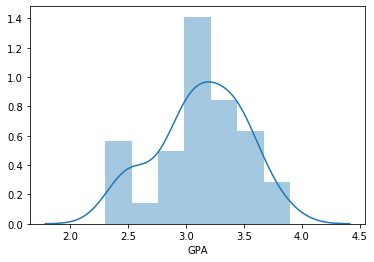

In [152]:
sns.distplot(df3.GPA);

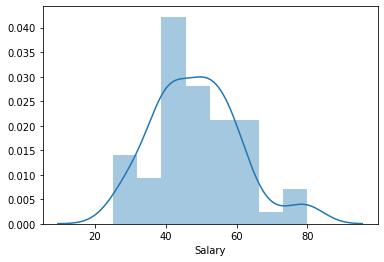

In [149]:
sns.distplot(df3.Salary);

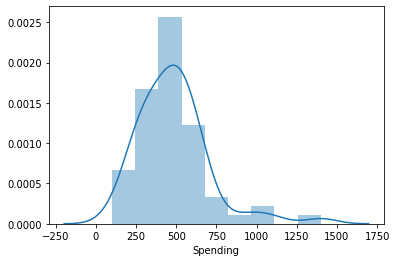

In [150]:
sns.distplot(df3.Spending);

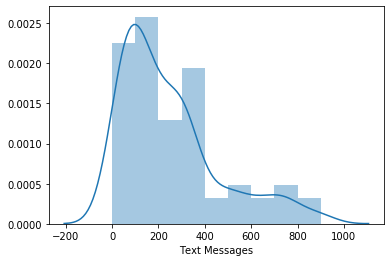

In [151]:
sns.distplot(df3['Text Messages']);

From these histograms we can understand that only GPA and Spending are normally distributed

# 3. An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

## The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

## 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [187]:
data = pd.read_csv('A+&+B+shingles.csv')

In [188]:
data.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [189]:
data.isnull().sum()

A    0
B    5
dtype: int64

In [190]:
data = data.dropna()
data.isnull().sum()

A    0
B    0
dtype: int64

## 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

## The sample has two set of data with different sample numbers.With the moisture content given it is one tailed testThe sample has two set of data with different sample numbers..With the moisture content given it is one tailed test
N(a) = 36

N(b) = 31

# Formulating Null and Alternate hypothesis
Null hypothesis states the mean moisture is greater then or equal to 0.35.

Alternate hypothesis states the mean moisture is less then 0.35.

𝐻0: 𝜇A and 𝜇B ≥ 0.35

𝐻𝐴: 𝜇A and 𝜇B < 0.35

Assume  𝛼 = 0.05.

As this is one tailed one sample T-test,scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and it is one tailed divide p value by 2

In [178]:
t_statistic_A, p_value_A = ttest_1samp(data.A, 0.35)
p_val_A  = p_value_A/2
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic_A, p_val_A))

alpha_value = 0.05 
print('Level of significance: %.2f' %alpha_value)
if p_val_A < alpha_value: 
    print('We have evidence to reject the null hypothesis for sample A since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis  sample A since p value > Level of significance') 

print ("Our one-sample t-test for sample A p-value=", p_val_A)

One sample t test 
t statistic: -1.6005252585398313 p value: 0.05998085400516971 
Level of significance: 0.05
We have no evidence to reject the null hypothesis  sample A since p value > Level of significance
Our one-sample t-test for sample A p-value= 0.05998085400516971


In [177]:
t_statistic_B, p_value_B = ttest_1samp(data.B, 0.35)
p_val_B  = p_value_B/2
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic_B, p_val_B))

alpha_value = 0.05 
print('Level of significance: %.2f' %alpha_value)
if p_val_B < alpha_value: 
    print('We have evidence to reject the null hypothesis for sample B since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis  sample B since p value > Level of significance') 

print ("Our one-sample t-test for sample B p-value=", p_val_B)

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191813 
Level of significance: 0.05
We have evidence to reject the null hypothesis for sample B since p value < Level of significance
Our one-sample t-test for sample B p-value= 0.0020904774003191813


## The P value of Sample A is higher then Alpla.Therefore Sample A rejects null hypothesis.So with 95% confidence the mean moisture of the sample A is less then 0.35

## The P value of Sample B is lower then Alpla.Therefore Sample A Accepts null hypothesis.So with 95% confidence the mean moisture of the sample A is equal to or higher then 0.35

# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

N(a) = 36

N(b) = 31

# Formulating Null and Alternative hypothesis

## The null hypothesis states that the mean moisture of shingles A and B are equal, 𝜇A=𝜇B.

## The alternative hypthesis states the mean moisture of shingles A and B are not equal, 𝜇A!=𝜇B.


𝐻0: 𝜇A=𝜇B

𝐻𝐴: 𝜇A!=𝜇B

Assume that  𝛼 = 0.05(Level of significance)

So Sample sizes for both samples are same.

We have two paired samples and we do not know the population standard deviation.

The sample is not a large sample,. So you use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for two sample paired test.

We use the scipy.stats.ttest_rel to calculate the T-test on TWO RELATED samples of scores. This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values. Here we give the two sample observations as input. This function returns t statistic and two-tailed p value.


In [191]:
t_statistic, p_value  =  stats.ttest_rel(data['A'],data['B'])
print('tstat  %1.3f' % t_statistic)    
print("p-value for two-tail:", p_value)

tstat  0.845
p-value for two-tail: 0.4050738703654344


In [192]:
print ("Paired two-sample t-test p-value=", p_value)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    

Paired two-sample t-test p-value= 0.4050738703654344
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis


# We have 95% confidence that he mean moisture of shingles A is not equal to mean moisture of shingles B 